# Import and Setting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q lda
!pip install -q "tmtoolkit[recommended, lda]"

In [ ]:
import warnings
import pandas as pd
import numpy as np
import random
import pickle

from lda import LDA
import scipy.sparse
from tmtoolkit.topicmod.tm_lda import compute_models_parallel, evaluate_topic_models
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words
from tmtoolkit.topicmod.model_io import save_ldamodel_to_pickle, load_ldamodel_from_pickle
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics, print_ldamodel_topic_words
from tmtoolkit.topicmod.visualize import plot_eval_results, parameters_for_ldavis

SEED = 2004
random.seed(SEED)
np.set_printoptions(precision=5)
warnings.filterwarnings("ignore")

DIR = 'drive/MyDrive/dtsa5799_product_review_topic_model'
DATA_DIR = '%s/data' % DIR

# Evaluation

In [ ]:
# load
dtm_sm = scipy.sparse.load_npz(f'{DATA_DIR}/new_dtm_sm.npz')
dtm_bg = scipy.sparse.load_npz(f'{DATA_DIR}/new_dtm_bg.npz')

doc_labels_sm = pickle.load(open(f'{DATA_DIR}/new_doc_labels_sm.p', 'rb'))
doc_labels_bg = pickle.load(open(f'{DATA_DIR}/new_doc_labels_bg.p', 'rb'))

vocab_sm = pickle.load(open(f'{DATA_DIR}/new_vocab_sm.p', 'rb'))
vocab_bg = pickle.load(open(f'{DATA_DIR}/new_vocab_bg.p', 'rb'))

In [ ]:
def evaluate_lda(dtm, eta=0.1, alpha_factor=1):
    lda_params = {'n_iter': 500,'eta': eta, 'random_state': SEED  }
    ks = list(range(1, 50, 5))
    print(ks)
    varying_params = [dict(n_topics=k, alpha=(alpha_factor*(1/k))) for k in ks]
    print(varying_params)
    eval_results = evaluate_topic_models(dtm, varying_params, lda_params)
    results_by_n_topics = results_by_parameter(eval_results, 'n_topics')
    print(results_by_n_topics)
    plot_eval_results(results_by_n_topics)

Evaluating LDA dtm_sm with eta=0.1 and alpha_factor=0.5
[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
[{'n_topics': 1, 'alpha': 0.5}, {'n_topics': 6, 'alpha': 0.08333333333333333}, {'n_topics': 11, 'alpha': 0.045454545454545456}, {'n_topics': 16, 'alpha': 0.03125}, {'n_topics': 21, 'alpha': 0.023809523809523808}, {'n_topics': 26, 'alpha': 0.019230769230769232}, {'n_topics': 31, 'alpha': 0.016129032258064516}, {'n_topics': 36, 'alpha': 0.013888888888888888}, {'n_topics': 41, 'alpha': 0.012195121951219513}, {'n_topics': 46, 'alpha': 0.010869565217391304}]
[(1, {'cao_juan_2009': nan, 'coherence_mimno_2011': -334.81169959602255}), (6, {'cao_juan_2009': 0.5269828175891192, 'coherence_mimno_2011': -385.2408232870569}), (11, {'cao_juan_2009': 0.4803185498405709, 'coherence_mimno_2011': -417.85652717407555}), (16, {'cao_juan_2009': 0.44613276287374537, 'coherence_mimno_2011': -421.1394680043662}), (21, {'cao_juan_2009': 0.4265253367890362, 'coherence_mimno_2011': -422.1176815770139}), (26, {'cao_juan

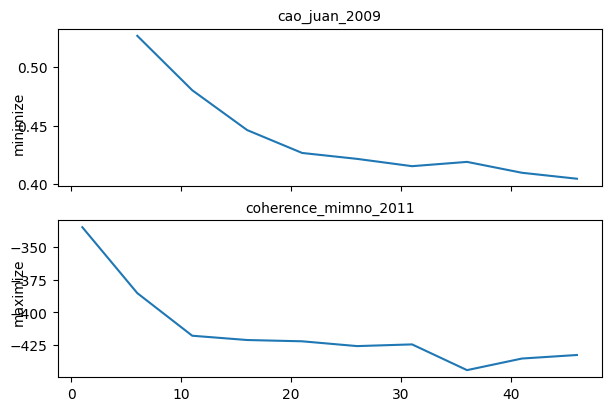

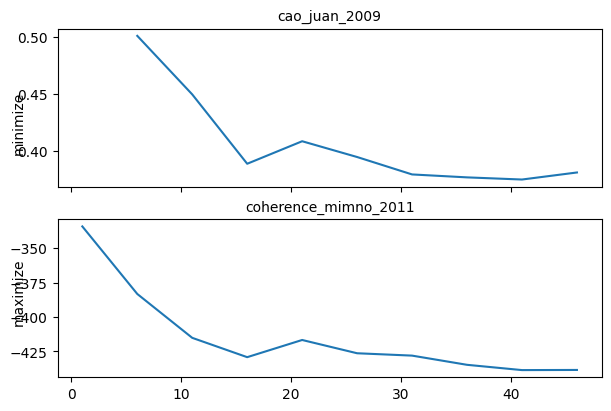

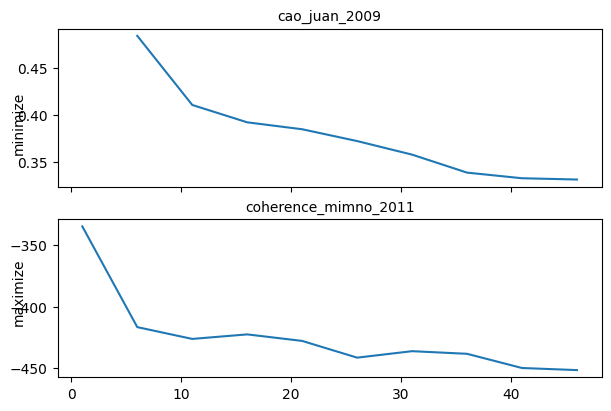

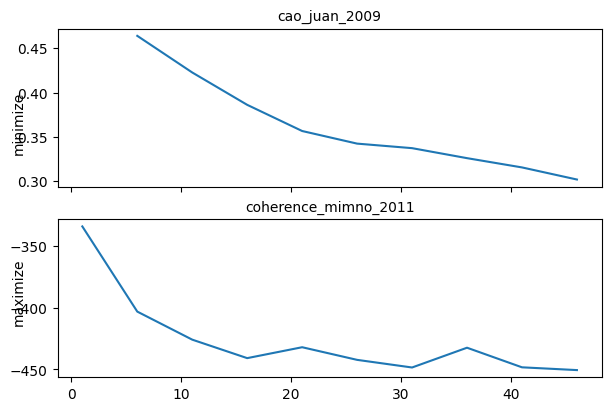

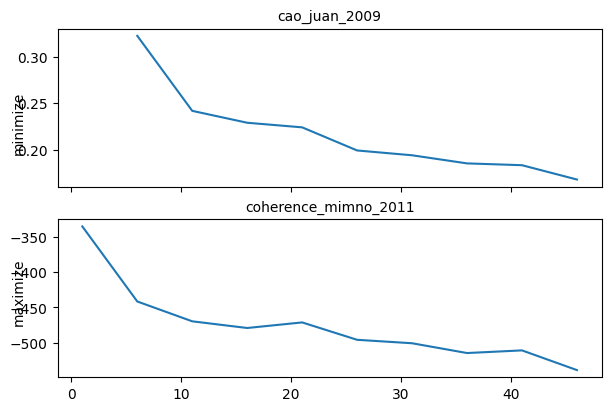

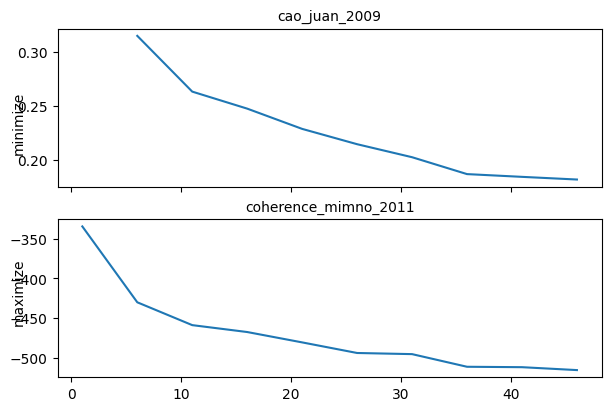

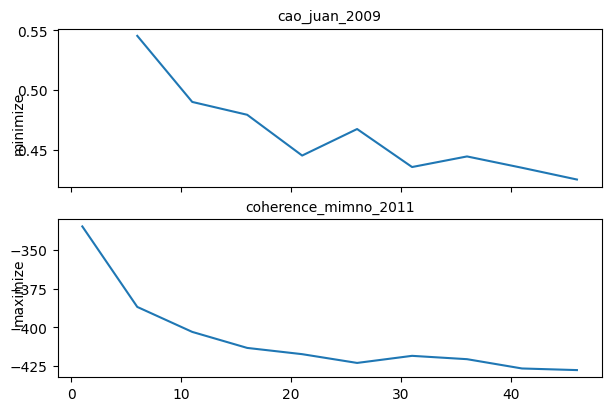

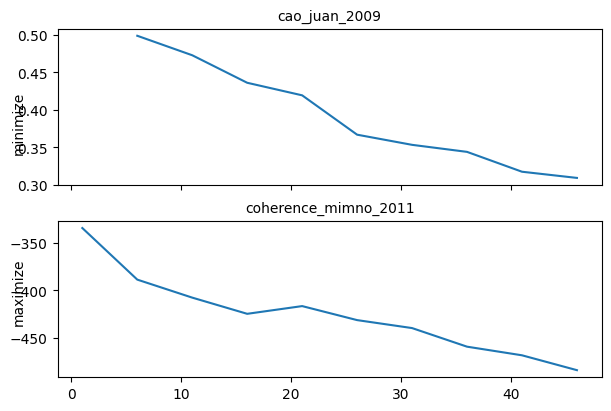

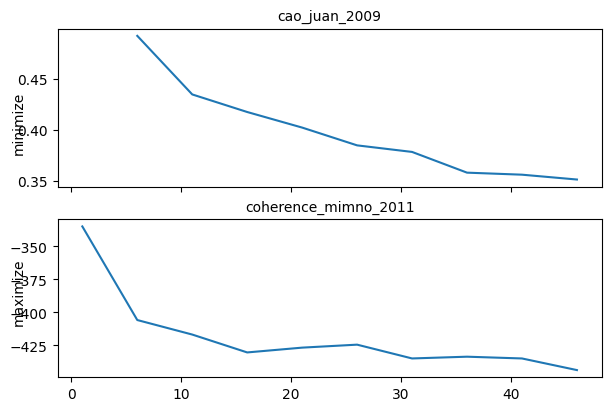

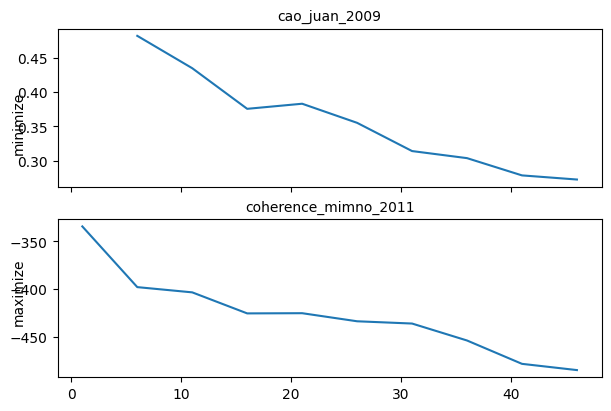

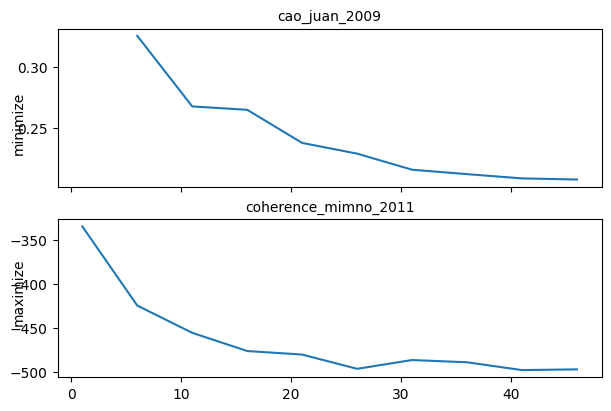

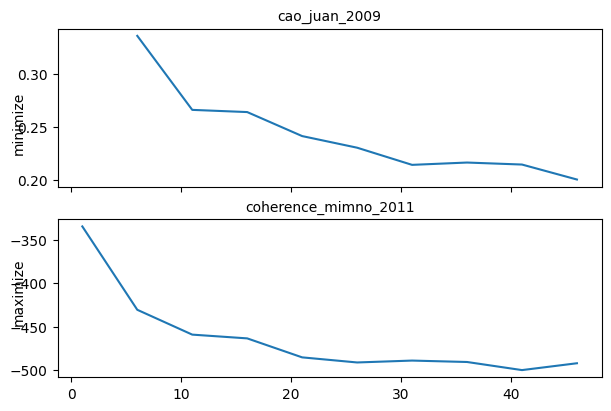

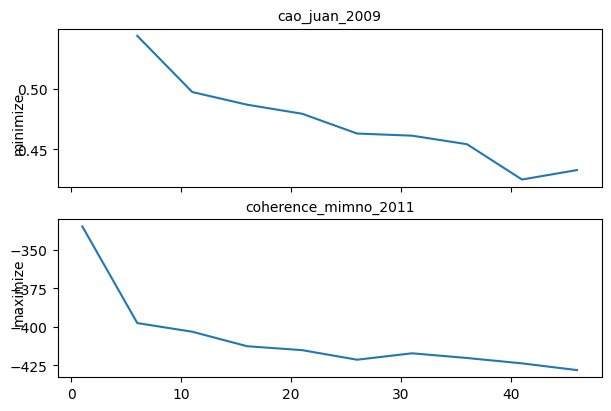

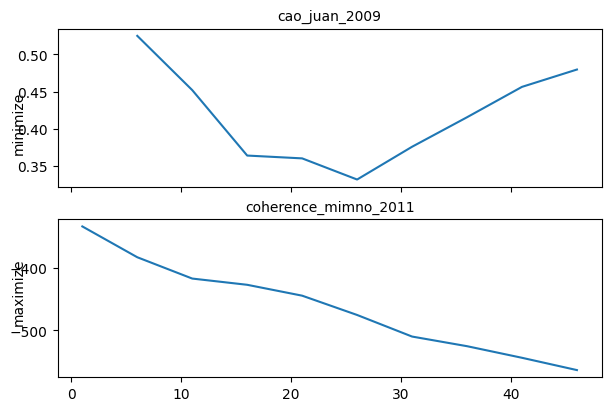

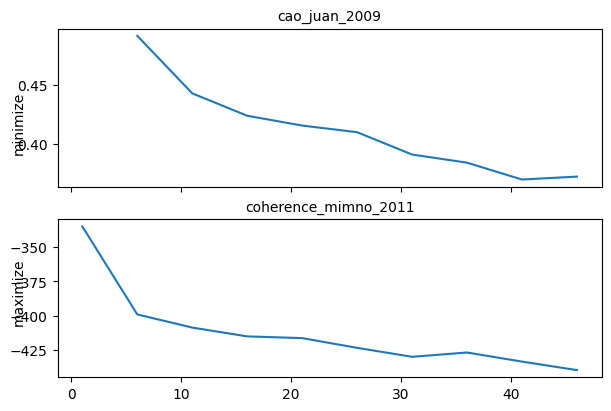

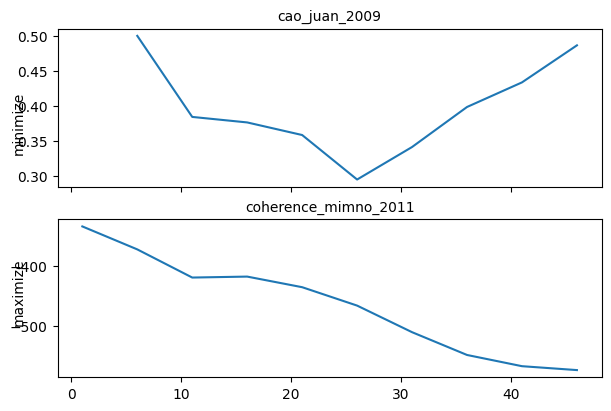

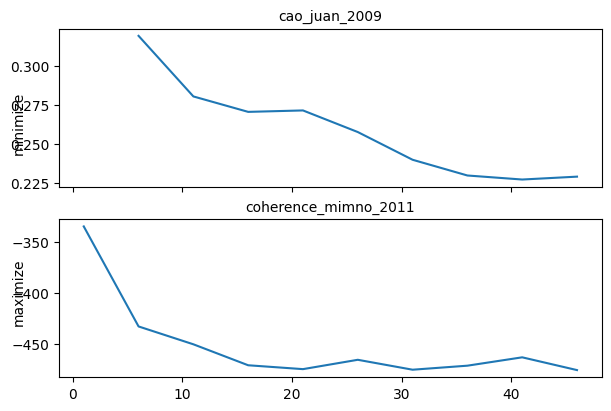

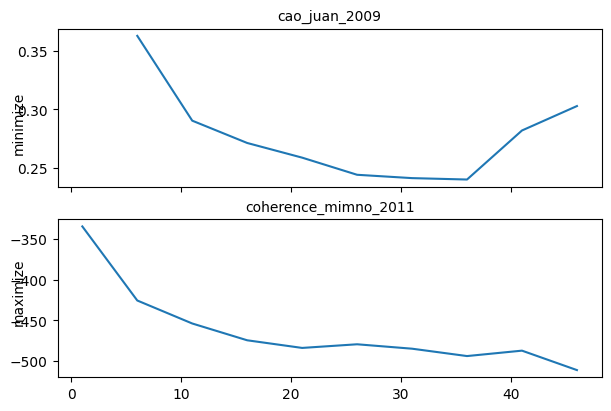

In [ ]:
etas = [0.1, 0.5, 1]
alpha_factors = [0.5, 1, 5]
dtms = {'dtm_sm': dtm_sm,
        'dtm_bg': dtm_bg}

for eta in etas:
  for alpha_factor in alpha_factors:
    for name, dtm in dtms.items():
      print(f"Evaluating LDA {name} with eta={eta} and alpha_factor={alpha_factor}")
      evaluate_lda(dtm, eta=eta, alpha_factor=alpha_factor)
      print('--------------------------------------------------------------')